<a href="https://colab.research.google.com/github/Smartsie/Playground/blob/master/Hands_on_Machine_Learning_Ex_1_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px

In [62]:
from yellowbrick.regressor import ResidualsPlot

In [2]:
!pip install 'umap-learn==0.3.10'
!pip install hdbscan

     |████████████████████████████████| 40 kB 3.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38883 sha256=7cbeeeafbe29d0fcfd80da6c31d1c5bed6da8e18bd56221327cbfbab2e8c708c
  Stored in directory: /root/.cache/pip/wheels/ea/d0/8f/9e64bfc5ed0645f89b639196bef92daf5c704285133efce12f
Successfully built umap-learn
     |████████████████████████████████| 6.4 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311876 sha256=e9d69f8628633dc5d0f80b79d7b31765811baf2ad396de526f3dc288aa417736
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [3]:
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path=os.path.join(housing_path,"housing.tgz")
  urllib.request.urlretrieve(housing_url,tgz_path)
  housing_tgz=tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path=os.path.join(housing_path,"housing.csv")
  return pd.read_csv(csv_path)

In [6]:
fetch_housing_data()
housing=load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [14]:
housing['income_cat']=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],
                             labels=[1,2,3,4,5])

In [15]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)  
for train_index,test_index in split.split(housing,housing['income_cat']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

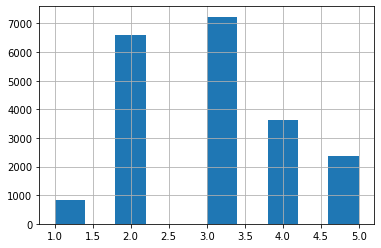

In [16]:
housing['income_cat'].hist()

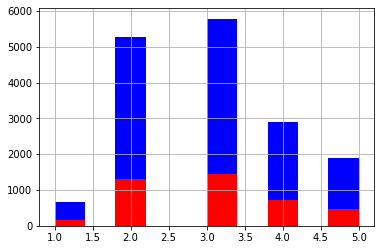

In [17]:
strat_train_set['income_cat'].hist(color='blue')
strat_test_set['income_cat'].hist(color='red')

In [18]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop(['income_cat'],axis=1,inplace=True)

In [19]:
housing=strat_train_set.copy()

In [20]:
px.scatter_mapbox(housing,lat='latitude',lon='longitude',mapbox_style='open-street-map',size='population',color='median_house_value',opacity=0.4,width=800, height=600)

In [24]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set['median_house_value']

In [61]:
imputer=SimpleImputer(strategy="median")

In [62]:
housing_num=housing.drop('ocean_proximity',axis=1)

In [63]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [64]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [65]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [66]:
X=imputer.transform(housing_num)

In [67]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [68]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [27]:
housing_cat=housing[['ocean_proximity']]

In [28]:

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [71]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [72]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

In [30]:
rooms_ix,bedrooms_ix,population_ix, households_ix=3,4,5,6

In [31]:
class CombinedAttritubesAdder(BaseEstimator,TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room=add_bedrooms_per_room
  def fit(self,X,y=None):
    return self # nothing else to do
  def transform(self,X):
    rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
    population_per_household=X[:,population_ix]/X[:,households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]


In [32]:
attr_adder=CombinedAttritubesAdder(add_bedrooms_per_room=False)

In [33]:
housing_extra_attribs=attr_adder.transform(housing.values)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
num_pipeline=Pipeline([
                       ('imputer',SimpleImputer(strategy='median')),
                       ('attribs_adder',CombinedAttritubesAdder()),
                       ('std_scaler',StandardScaler()),
])

In [38]:
housing_num=housing.drop('ocean_proximity',axis=1)
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [39]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num) # extracts columns names
cat_attribs=['ocean_proximity']
full_pipeline=ColumnTransformer([
                                 ("num",num_pipeline,num_attribs),
                                 ("cat",OneHotEncoder(),cat_attribs),
])
housing_prepared=full_pipeline.fit_transform(housing)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [41]:
model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

In [43]:
housing_predictions=model.predict(housing_prepared)
mse=mean_squared_error(housing_labels,housing_predictions)

In [44]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid=[
            {'n_estimators':[3,10,30],
             'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],
             'max_features':[2,3,4]},
]

In [47]:
forest_reg=RandomForestRegressor()

In [48]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [49]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [50]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [51]:
final_model=grid_search.best_estimator_

In [54]:
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set['median_house_value']
X_test_prepared=full_pipeline.transform(X_test)

In [55]:
final_prediction=final_model.predict(X_test_prepared)

In [57]:
final_mse=mean_squared_error(y_test, final_prediction)
final_rmse=np.sqrt(final_mse)

In [58]:
from scipy import stats

In [60]:
confidence=0.95
squared_errors=(final_prediction-y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([45824.40343748, 49700.0657671 ])

AttributeError: ignored

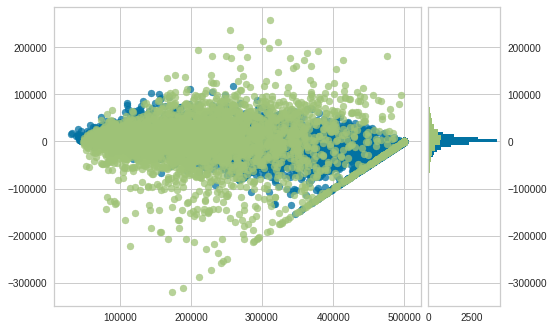

In [63]:
visualizer = ResidualsPlot(model)

visualizer.fit(housing_prepared,housing_labels)  # Fit the training data to the visualizer
visualizer.score(X_test_prepared, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [66]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(final_model,housing_prepared,housing_labels, X_test_prepared, y_test)

TypeError: ignored

In [67]:
from yellowbrick.regressor import prediction_error

In [68]:
viz = prediction_error(final_model,housing_prepared,housing_labels, X_test_prepared, y_test)

AttributeError: ignored